<a href="https://colab.research.google.com/github/RafsanJany-44/ARC_Machine/blob/main/Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

path="/content/drive/MyDrive/Iqram Sir/Tinnitus_ALR_features_106.csv"

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
dataset=pd.read_csv(path)

In [3]:
X = dataset.iloc[:, 3:]
y = dataset.iloc[:, 0]

In [4]:

from sklearn.feature_selection import SelectKBest
bestfeatures = SelectKBest(k=10)
fit = bestfeatures.fit(X,y)


In [5]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [6]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [7]:
featureScores

Specs      Score
0               n0_gap_peak_ms   5.355621
1               p1_gap_peak_ms   0.943330
2               n1_gap_peak_ms  10.975831
3               p2_gap_peak_ms   0.059269
4               n2_gap_peak_ms   2.251552
..                         ...        ...
101  nogap_auc_p1n1p2_by_total   2.191082
102  nogap_auc_n1p2n2_by_total  16.919739
103  nogap_auc_p2n2p3_by_total   3.357870
104          fft_gap_total_auc   0.193217
105        fft_nogap_total_auc   3.071969

[106 rows x 2 columns]

In [8]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                  Specs      Score
47      p3_gap_peak_amp  45.163320
72       gap_auc_n1p2_R  45.064316
43      p1_gap_peak_amp  42.386323
46      n2_gap_peak_amp  39.547251
38  n1p3_interval_nogap  37.128241
74       gap_auc_n1p2_L  35.014730
69       gap_auc_p1n1_R  28.903982
33  p1p2_interval_nogap  27.769729
76       gap_auc_n1p2n2  26.659414
65  p2n2_gap_nogap_diff  24.767763


In [9]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(featureScores.nlargest(10,'Score'))

                  Specs      Score
47      p3_gap_peak_amp  45.163320
72       gap_auc_n1p2_R  45.064316
43      p1_gap_peak_amp  42.386323
46      n2_gap_peak_amp  39.547251
38  n1p3_interval_nogap  37.128241
74       gap_auc_n1p2_L  35.014730
69       gap_auc_p1n1_R  28.903982
33  p1p2_interval_nogap  27.769729
76       gap_auc_n1p2n2  26.659414
65  p2n2_gap_nogap_diff  24.767763


In [10]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.00778591 0.01084194 0.00795081 0.00967572 0.00903636 0.00766605
 0.01135535 0.00917148 0.00886223 0.00835786 0.00819541 0.00888716
 0.00723512 0.00767909 0.00867551 0.00777414 0.00798525 0.01423931
 0.0079184  0.00912741 0.00682067 0.00797486 0.00734285 0.00605247
 0.01237717 0.0065636  0.00738525 0.01011216 0.00742306 0.0068005
 0.00930183 0.00893781 0.00784896 0.0134973  0.0104371  0.00736172
 0.00814238 0.00854362 0.01756907 0.01063147 0.01918278 0.0073323
 0.00723556 0.01702541 0.00732578 0.01109643 0.02018255 0.02518036
 0.00601388 0.00739831 0.01036461 0.00856139 0.01122333 0.00967193
 0.01503605 0.00765462 0.00983572 0.00765321 0.00956988 0.01256258
 0.01139309 0.01033847 0.00843052 0.00706035 0.00749297 0.00934718
 0.01038696 0.0103812  0.01290709 0.01263728 0.00890244 0.01035018
 0.02140598 0.00750359 0.01728121 0.00592918 0.01120479 0.00699254
 0.00727582 0.00761773 0.00826576 0.00821887 0.00987689 0.00937228
 0.00825078 0.00908777 0.00753177 0.00819723 0.00756281 0.010218

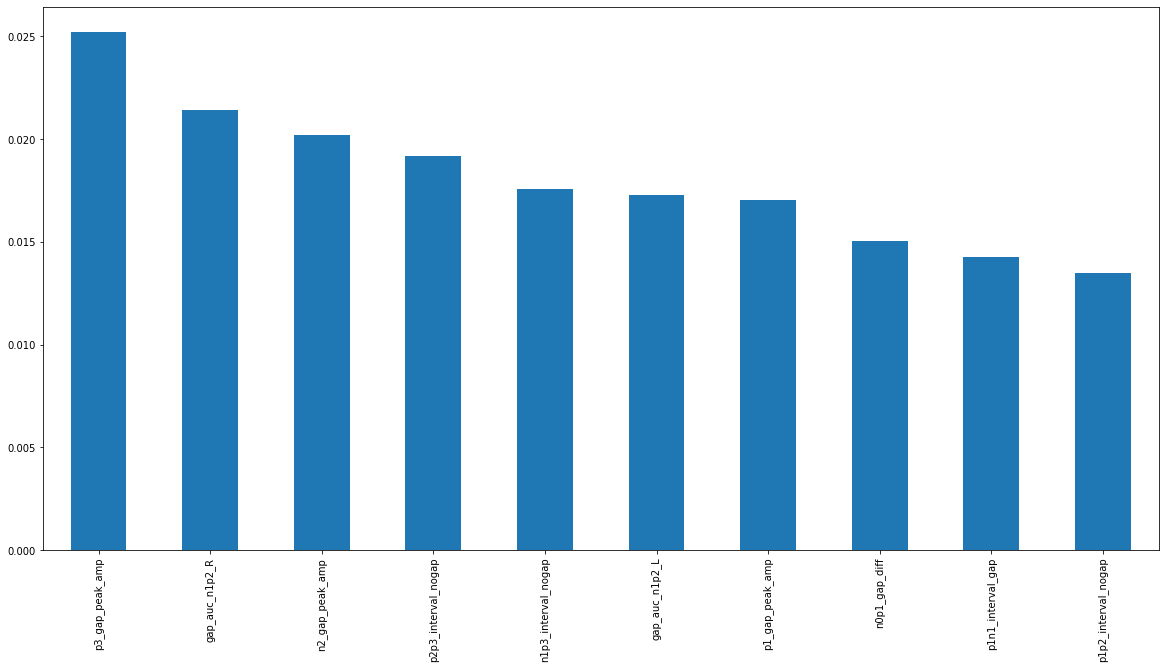

                  Specs      Score
47      p3_gap_peak_amp  45.163320
72       gap_auc_n1p2_R  45.064316
43      p1_gap_peak_amp  42.386323
46      n2_gap_peak_amp  39.547251
38  n1p3_interval_nogap  37.128241
74       gap_auc_n1p2_L  35.014730
69       gap_auc_p1n1_R  28.903982
33  p1p2_interval_nogap  27.769729
76       gap_auc_n1p2n2  26.659414
65  p2n2_gap_nogap_diff  24.767763


In [11]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(figsize=(20,10),kind="bar")
plt.show()
print(featureScores.nlargest(10,'Score'))

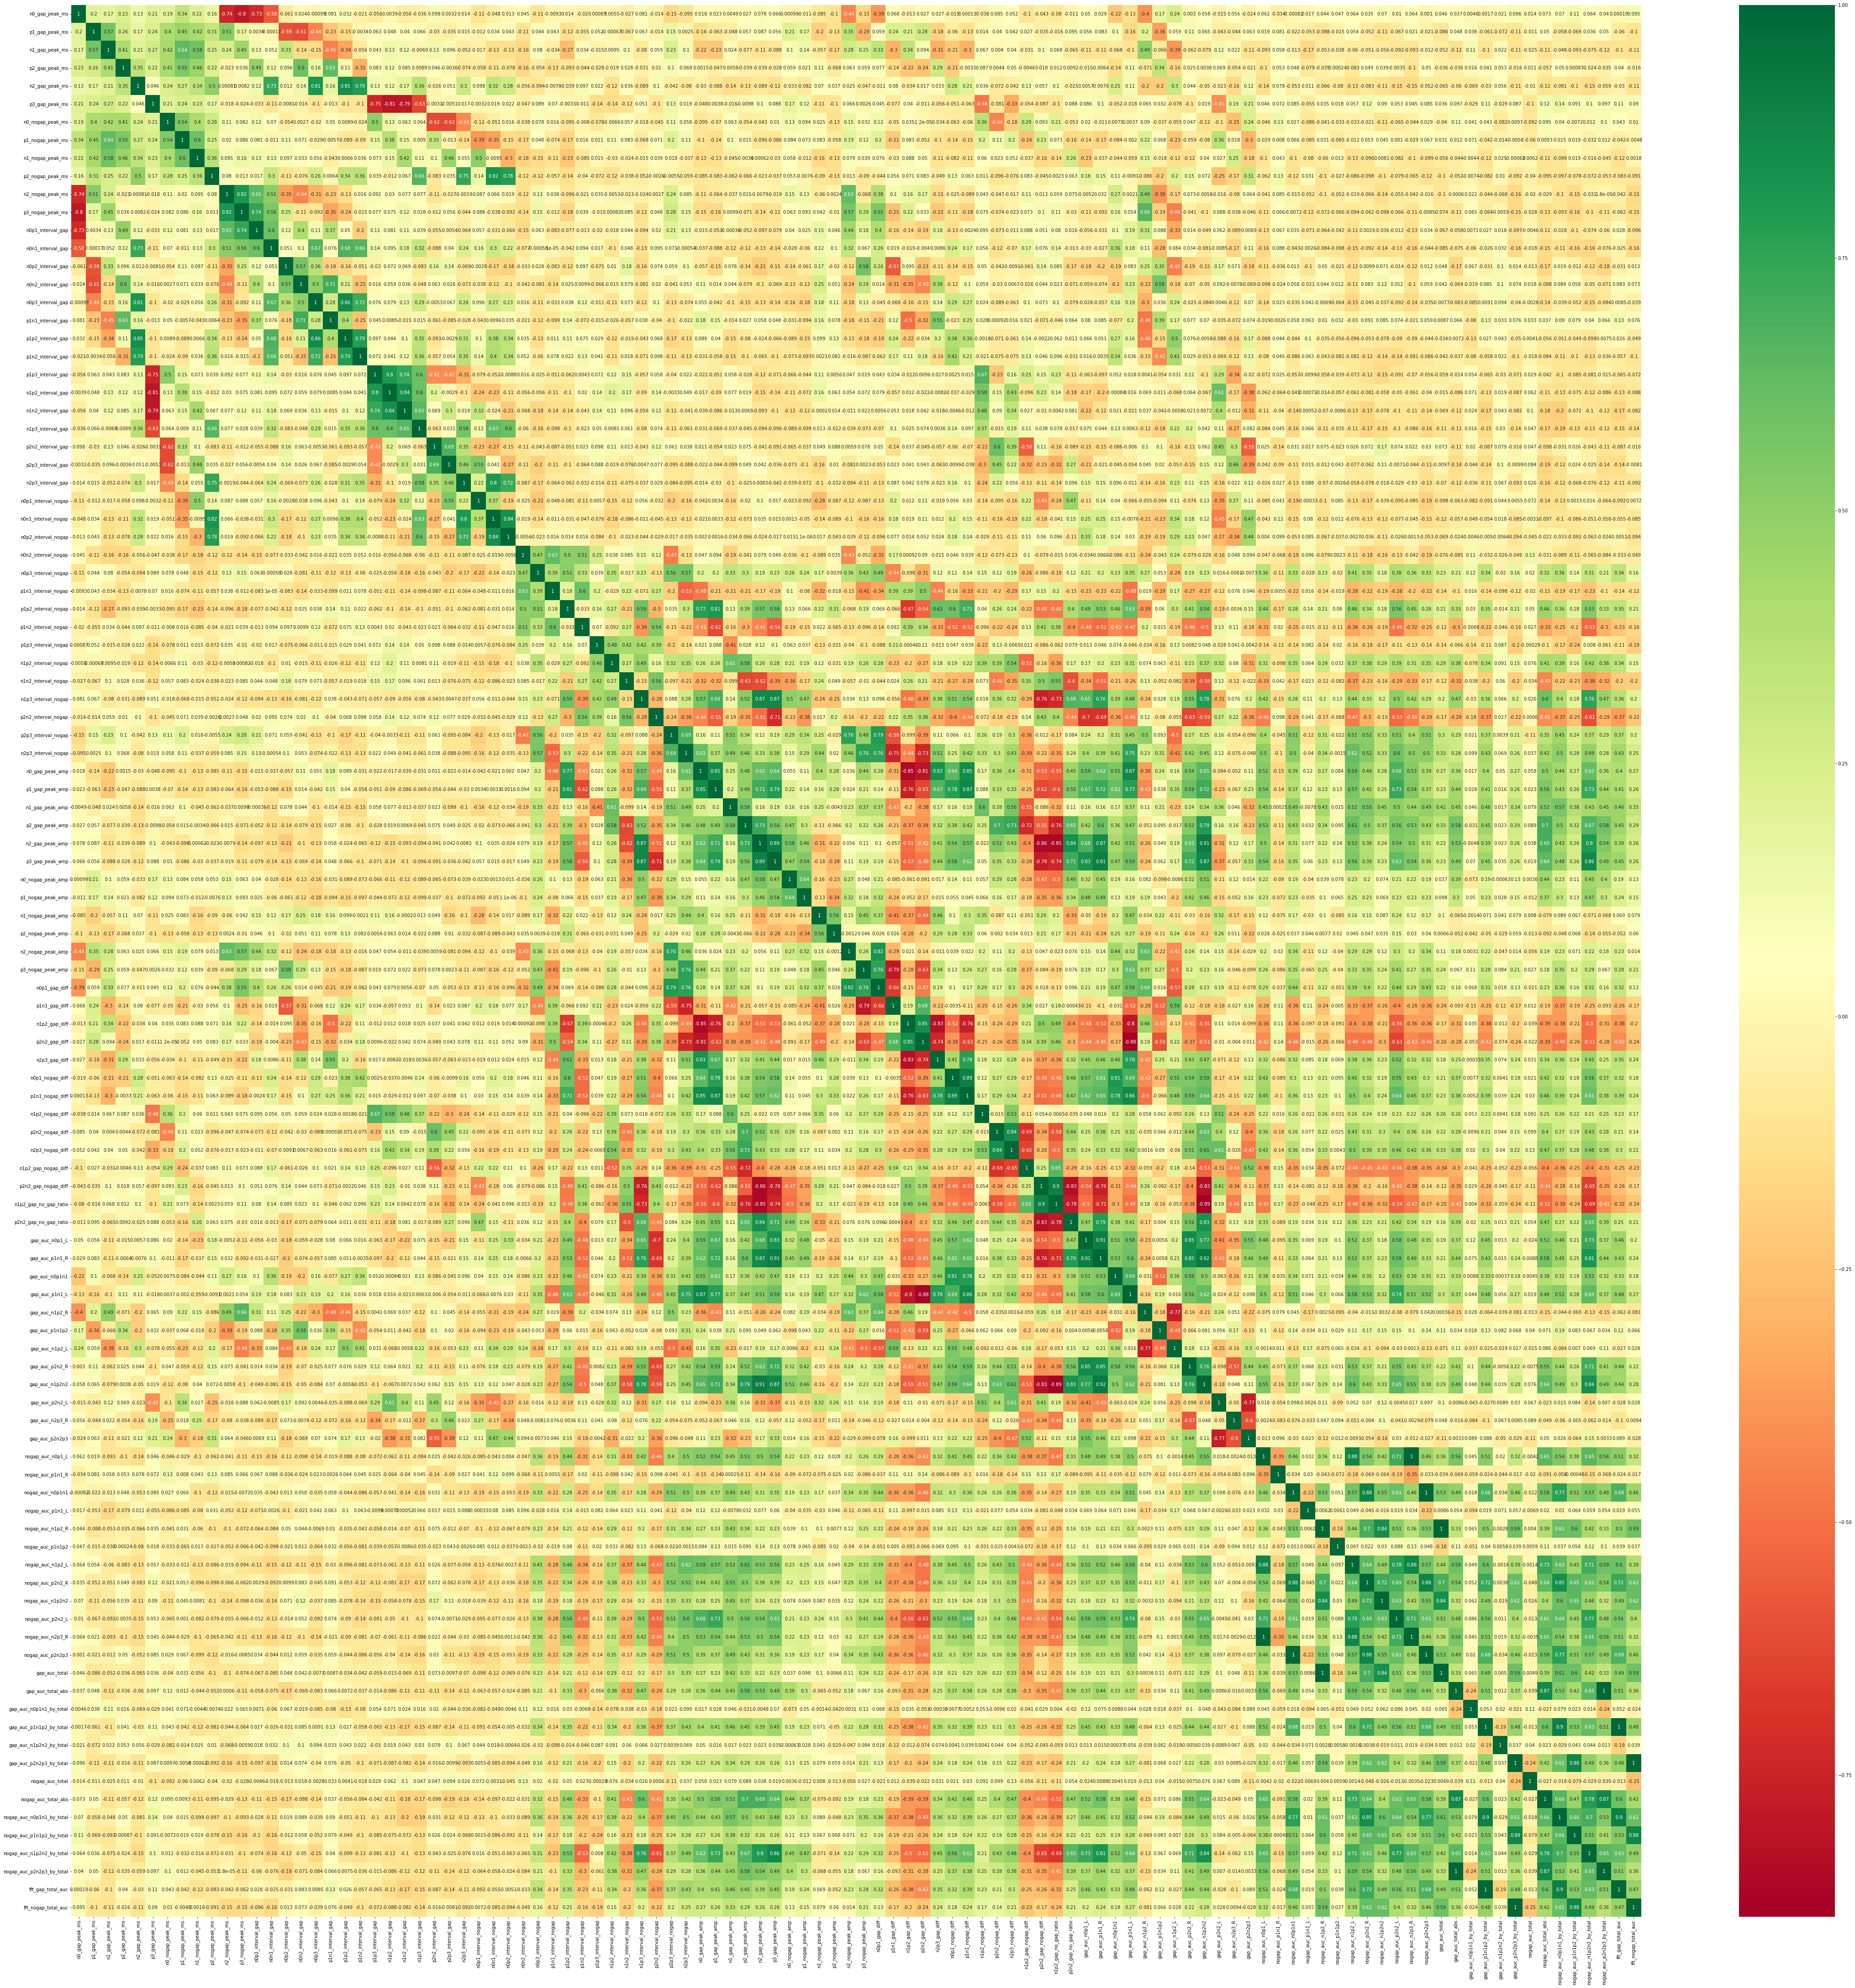

In [13]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(77,77))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")